# School Count Vs House Price 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time, json, os, csv
import seaborn as sns
import scipy.stats as st
import datetime
import random
from scipy.stats import linregress
from scipy.stats import ttest_ind
from citipy import citipy
from pprint import pprint

In [2]:
# Read data files
house_df = pd.read_csv("data_source/cleaned_source_data/house_cleaned.csv")
school_df = pd.read_csv("data_source/cleaned_source_data/school_cleaned.csv")

In [3]:
house_school_df = pd.merge(house_df, school_df, on="Suburb", how="inner")

In [4]:
house_df['Price'] = house_df['Price'].astype(int)

In [5]:
avg_houseprice_eachsuburb = round(house_df.groupby(["Suburb"])["Price"].mean())
avg_houseprice_eachsuburb.head()

Suburb
Abbotsford      1033549.0
Aberfeldie      1307193.0
Airport West     751364.0
Albanvale        536056.0
Albert Park     1927651.0
Name: Price, dtype: float64

In [6]:
all_school_count = school_df.groupby(['Suburb'])['School_Name'].count() 
all_school_count

Suburb
Abbotsford      2
Aberfeldie      2
Aintree         1
Aireys Inlet    1
Airly           1
               ..
Yea             3
Yering          1
Yinnar          1
Yinnar South    1
Zeerust         1
Name: School_Name, Length: 960, dtype: int64

In [7]:
#Combine results and Create a new DataFrame with obtained results

result_df = pd.DataFrame({
                        "Average House Price" : avg_houseprice_eachsuburb,
                        "Number of Schools" : all_school_count,
                    })


In [8]:
# drop Nan values
AvgHousePrice_SchoolCount_df = result_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
AvgHousePrice_SchoolCount_df

,Average House Price,Number of Schools
Suburb,,
Abbotsford,1033549.0,2.0
Aberfeldie,1307193.0,2.0
Airport West,751364.0,1.0
Albanvale,536056.0,1.0
Albert Park,1927651.0,3.0
...,...,...
Wonga Park,1357500.0,1.0
Wyndham Vale,511940.0,4.0
Yallambie,820861.0,1.0


In [9]:
AvgHousePrice_SchoolCount_df.sort_values(by=['Number of Schools'])

,Average House Price,Number of Schools
Suburb,,
Mont Albert,1502767.0,1.0
Caulfield East,1060263.0,1.0
Caulfield,763531.0,1.0
Kealba,580250.0,1.0
Carrum,739625.0,1.0
...,...,...
Glen Waverley,1333909.0,13.0
St Albans,609180.0,13.0
Werribee,526852.0,14.0


# Scatter plot 

### Average House price of each suburb vs Number of schools in that Suburb

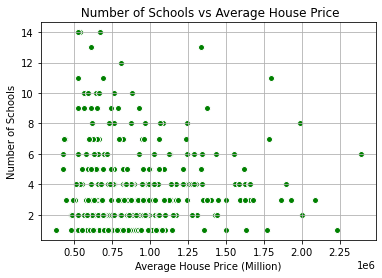

In [10]:
plt.scatter(AvgHousePrice_SchoolCount_df["Average House Price"],AvgHousePrice_SchoolCount_df["Number of Schools"], facecolors = "green", marker = "o", edgecolor = "white")
plt.title(" Number of Schools vs Average House Price")
plt.ylabel("Number of Schools")
plt.xlabel("Average House Price (Million)")
plt.grid(True)
plt.savefig("data_source/output/Suburb_AvgHousePrice_SchoolCount.png")
plt.show()

### Even if there are 10-14 schools in some suburbs.. the Average House Price stayed around 500 k to 750 k    


###  Houses over 1.25 mil does not necessarily have a lot of Schools in their respective suburbs

### ------------------------------------------------------------------------------------------------------------------------------

### In order to get a better picture we made Bins based on School Count

# School Group Bins

In [11]:
school_bins = [0,3.99,7.99,11.99,99999]

group_names = ["<4", "4-8","9-12","12+"]

In [12]:
merge_schoolcount_df = pd.merge(school_df, AvgHousePrice_SchoolCount_df, on = "Suburb",  how = "inner")


In [13]:
merge_schoolcount_df["School Count Group"] = pd.cut(merge_schoolcount_df["Number of Schools"], school_bins, labels=group_names)


In [14]:
SchoolCount_Group_df = merge_schoolcount_df.loc[:, ["School Count Group","School_Name","Number of Schools"]]


In [15]:
schoolgroup_houseprice_df = pd.merge(SchoolCount_Group_df,AvgHousePrice_SchoolCount_df, sort= True)


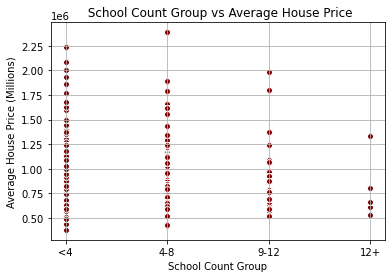

In [42]:
plt.scatter(schoolgroup_houseprice_df["School Count Group"],schoolgroup_houseprice_df["Average House Price"], facecolors = "maroon", marker = "o", edgecolor = "white")
plt.title(" School Count Group vs Average House Price")
plt.ylabel("Average House Price (Millions)")
plt.xlabel("School Count Group")
plt.grid(True)
plt.savefig("data_source/output/AvgHousePrice_SchoolCount_Group.png")
plt.show()

### ------------------------------------------------------------------------------------------------------------------------------

# By Council Area

In [17]:
merged_council_df = pd.merge(house_df, school_df, on= 'CouncilArea', how = 'inner' )
merged_council_df.head()

,Suburb_x,Address_x,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode_x,...,School_Name,School_Type,Address_y,Suburb_y,Postcode_y,Full_Phone_No,LGA_ID,LGA_Name,Longitude_y,Latitude_y
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/16,2.5,3067,...,Fitzroy Primary School,Primary,319 George Street,Fitzroy,3065,03 9417 4222,735,Yarra,144.981511,-37.799603
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/16,2.5,3067,...,Carlton North Primary School,Primary,60 Lee Street,Carlton North,3054,03 9347 4822,735,Yarra,144.973028,-37.791064
2,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/16,2.5,3067,...,Clifton Hill Primary School,Primary,185 Gold St,Clifton Hill,3068,03 9489 8333,735,Yarra,144.989245,-37.792308
3,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/16,2.5,3067,...,Fitzroy North Primary School,Primary,3 Fergie Street,Fitzroy North,3068,03 9481 5860,735,Yarra,144.984149,-37.785020
4,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/16,2.5,3067,...,Abbotsford Primary School,Primary,Lithgow Street,Abbotsford,3067,03 9428 5977,735,Yarra,144.998814,-37.808979


In [18]:
mean_houseprice_eachCouncil = round(house_df.groupby(["CouncilArea"]).mean()["Price"])

In [19]:
CouncilArea_school_count = school_df.groupby(['CouncilArea'])['School_Name'].count() 

In [20]:
merged_df = pd.DataFrame({ "Average_House_Price" : mean_houseprice_eachCouncil,
                      "Number_of_Schools" : CouncilArea_school_count,
                    })


In [21]:
CouncilArea_AvgHousePrice_SchoolCount_df = merged_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
CouncilArea_AvgHousePrice_SchoolCount_df.head()

,Average_House_Price,Number_of_Schools
CouncilArea,,
Banyule City Council,936369.0,43.0
Bayside City Council,1574122.0,28.0
Boroondara City Council,1667326.0,58.0
Brimbank City Council,682182.0,59.0
Cardinia Shire Council,572923.0,38.0


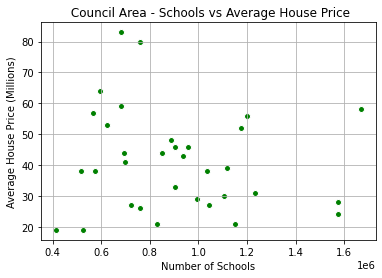

In [41]:
plt.scatter(CouncilArea_AvgHousePrice_SchoolCount_df["Average_House_Price"],CouncilArea_AvgHousePrice_SchoolCount_df["Number_of_Schools"], facecolors = "green", marker = "o", edgecolor = "white")
plt.title(" Council Area - Schools vs Average House Price")
plt.ylabel("Average House Price (Millions)")
plt.xlabel("Number of Schools")
plt.grid(True)
plt.savefig("data_source/output/CouncilArea_AvgHousePrice_SchoolCount.png")
plt.show()

# Linear Regression of Average House price vs Number of Schools

The correlation coefficient between Average House Price and Number of Schools is -0.04
The r-squared is: 0.0013904405936672295


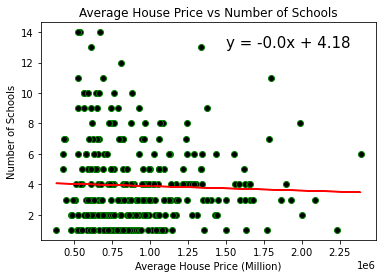

In [23]:


x_values= AvgHousePrice_SchoolCount_df["Average House Price"].astype(int)

y_values= AvgHousePrice_SchoolCount_df["Number of Schools"].astype(int)
print(f"The correlation coefficient between Average House Price and Number of Schools is {round(st.pearsonr(x_values,y_values)[0],2)}")

color = 'red'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, linewidths = 1,marker = "o",edgecolors = "green", color = "black")
plt.plot(x_values,regress_values,color)
plt.annotate(line_eq,(1500000,13), fontsize=15, color="black")
plt.title("Average House Price vs Number of Schools")
plt.xlabel('Average House Price (Million)')
plt.ylabel('Number of Schools')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("data_source/output/Regression_Suburb_AvgHousePrice_SchoolCount1.png")
plt.show()

### Correlation Coefficient between Average house Price and Number of Schools is Negetive -0.037

In [24]:
AvgHousePrice_SchoolCount_df.corr().style.background_gradient(cmap ='coolwarm')

,Average House Price,Number of Schools
Average House Price,1.000000,-0.037289
Number of Schools,-0.037289,1.000000


# Government Vs Private

In [25]:
sector_data1 = school_df.groupby(['Suburb'])["Education_Sector"].agg(['value_counts'])
sector_data1

value_counts
Suburb       Education_Sector              
Abbotsford   Government                   1
             Private                      1
Aberfeldie   Private                      2
Aintree      Government                   1
Aireys Inlet Government                   1
...                                     ...
Yea          Private                      1
Yering       Government                   1
Yinnar       Government                   1
Yinnar South Government                   1
Zeerust      Government                   1

[1321 rows x 1 columns]

In [26]:
school_df1 = school_df.loc[:, ["Education_Sector","School_Name", "Suburb", "Postcode"]]


In [27]:
government_sector = school_df.loc[school_df['Education_Sector'] == 'Government'] 


In [28]:
government_sector = government_sector[['Education_Sector','Suburb']]

In [29]:
government_final = pd.merge(government_sector,AvgHousePrice_SchoolCount_df, on= 'Suburb')


In [30]:
private_sector = school_df.loc[school_df['Education_Sector'] == 'Private'] 

In [31]:
private_sector = private_sector[['Education_Sector','Suburb']]

In [32]:
private_final = pd.merge(private_sector,AvgHousePrice_SchoolCount_df, on= 'Suburb')

The correlation coefficient between both factors is -0.21
The correlation coefficient between both factors is -0.11


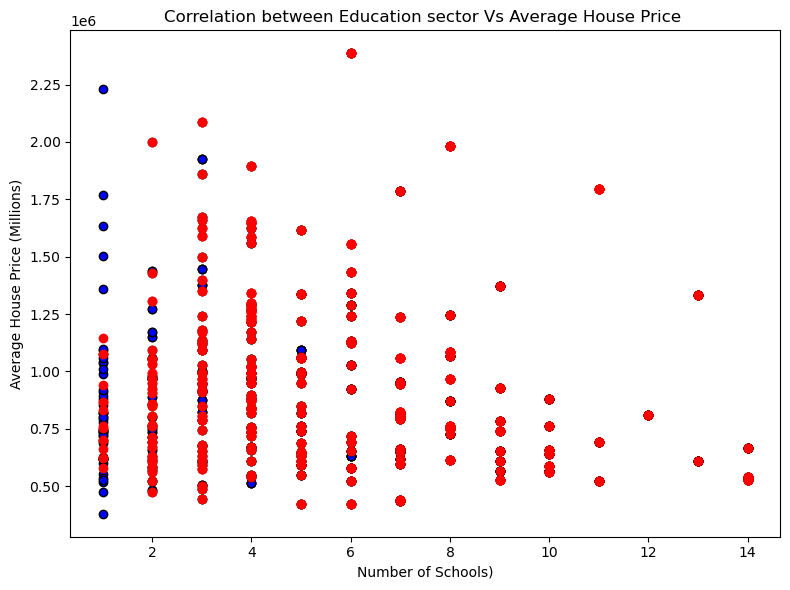

In [33]:
fig = plt.figure(figsize=(8,6), dpi=100)

plt.scatter(government_final["Number of Schools"],government_final["Average House Price"], marker = "o", facecolors = "blue", edgecolors = "black")
correlation=st.pearsonr(government_final["Number of Schools"],government_final["Average House Price"])
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

plt.scatter(private_final["Number of Schools"],private_final["Average House Price"], marker = "o", facecolors = "red", edgecolors = "red")
correlation=st.pearsonr(private_final["Number of Schools"],private_final["Average House Price"])
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

plt.xlabel("Number of Schools)")
plt.ylabel("Average House Price (Millions)")
plt.title ("Correlation between Education sector Vs Average House Price ")

fig.tight_layout()
plt.savefig("data_source/output/Education_sector&AverageHousePrice.png")
plt.show()

### The correlation coefficient between Government schools and House Price is  -0.21.


### The correlation coefficient between Private Schools and House Price is -0.11

In [34]:
government_final.corr().style.background_gradient(cmap ='coolwarm')

,Average House Price,Number of Schools
Average House Price,1.000000,-0.211868
Number of Schools,-0.211868,1.000000


In [35]:
private_final.corr().style.background_gradient(cmap ='coolwarm')

,Average House Price,Number of Schools
Average House Price,1.000000,-0.113601
Number of Schools,-0.113601,1.000000


# Overall Summary Heat Maps

In [36]:
house_school_df.columns

Index(['Suburb', 'Address_x', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode_x', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea_x', 'Latitude_x',
       'Longitude_x', 'Regionname', 'Propertycount', 'Education_Sector',
       'School_Name', 'School_Type', 'Address_y', 'Postcode_y',
       'Full_Phone_No', 'LGA_ID', 'LGA_Name', 'CouncilArea_y', 'Longitude_y',
       'Latitude_y'],
      dtype='object')

In [37]:
house_school_df = house_school_df[["Suburb","Price","Rooms","Distance","Bathroom", "Car", "Landsize","BuildingArea","YearBuilt"]]


In [38]:
house_school_df.corr().style.background_gradient(cmap ='coolwarm')

,Price,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
Price,1.000000,0.454083,-0.244347,0.342366,0.199122,0.042166,0.090716,0.029112
Rooms,0.454083,1.000000,0.268345,0.460822,0.339774,0.034740,0.130500,0.074963
Distance,-0.244347,0.268345,1.000000,0.108238,0.177758,0.015773,0.050414,0.017004
Bathroom,0.342366,0.460822,0.108238,1.000000,0.616694,0.077391,0.194901,0.405525
Car,0.199122,0.339774,0.177758,0.616694,1.000000,0.069508,0.138403,0.297499
Landsize,0.042166,0.034740,0.015773,0.077391,0.069508,1.000000,0.084807,0.026312
BuildingArea,0.090716,0.130500,0.050414,0.194901,0.138403,0.084807,1.000000,0.255594
YearBuilt,0.029112,0.074963,0.017004,0.405525,0.297499,0.026312,0.255594,1.000000
